<a href="https://colab.research.google.com/github/nikhelll/Finance-Tidbits/blob/main/MovieLens100k_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Movies DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None

Ratings DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None

First few rows of Movies DataFrame:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2     

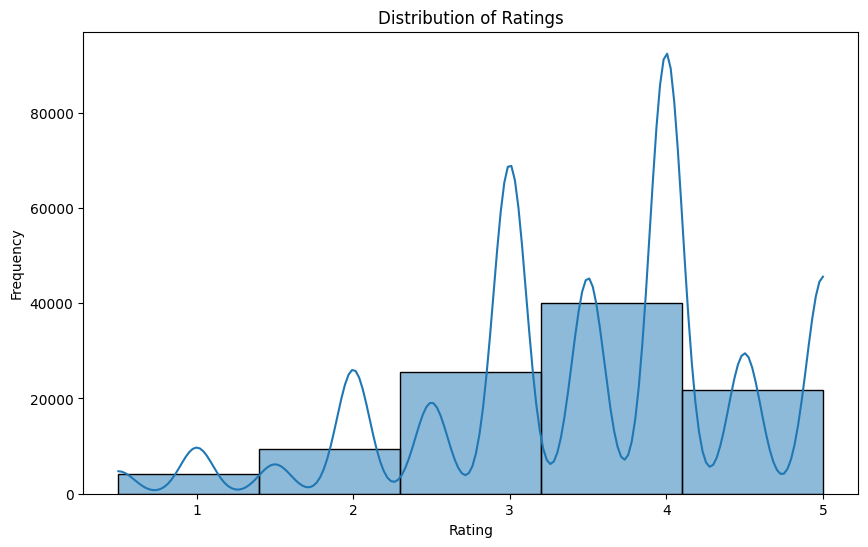

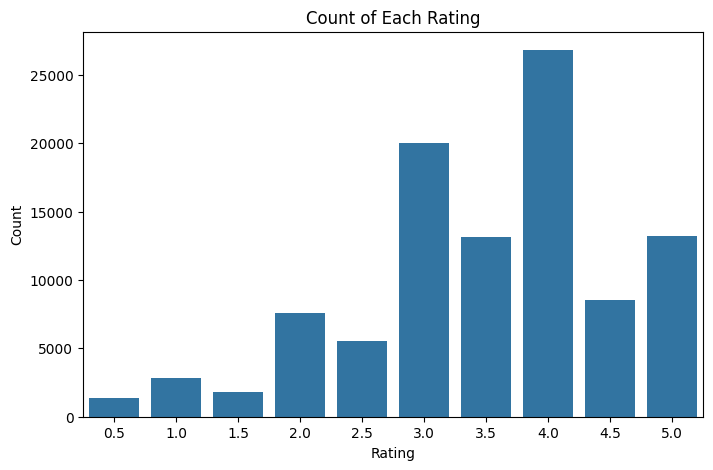

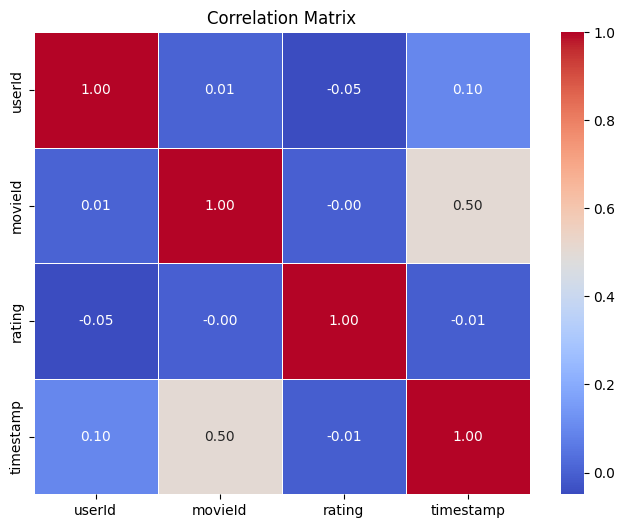


Top-Rated Movies:
                                          title  rating
7638      Paper Birds (Pájaros de papel) (2010)     5.0
8089                 Act of Killing, The (2012)     5.0
9065                            Jump In! (2007)     5.0
9076                               Human (2015)     5.0
9078                        L.A. Slasher (2015)     5.0
4245                           Lady Jane (1986)     5.0
8136             Bill Hicks: Revelations (1993)     5.0
8130               Justice League: Doom (2012)      5.0
4240  Open Hearts (Elsker dig for evigt) (2002)     5.0
9104                     Formula of Love (1984)     5.0


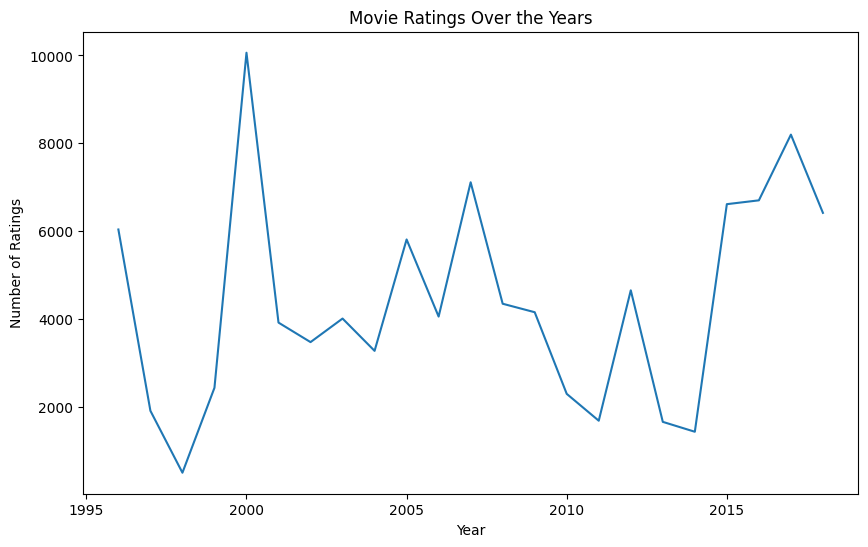

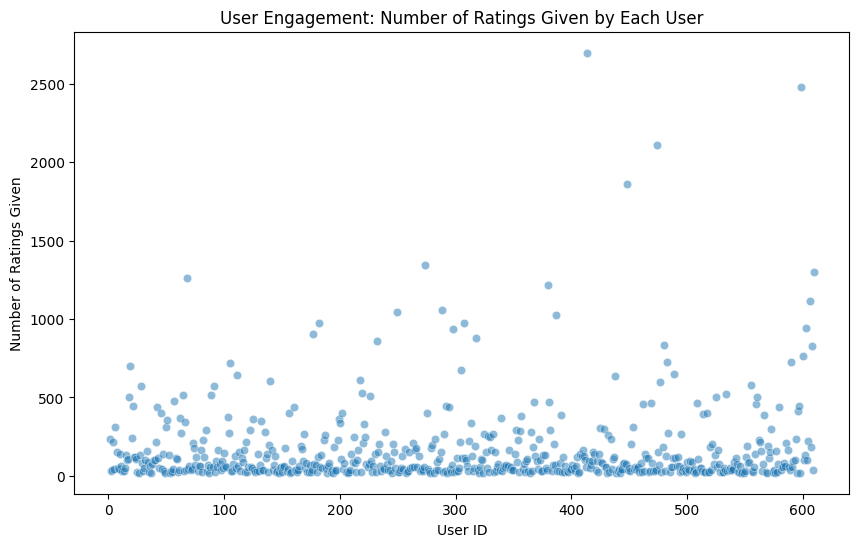

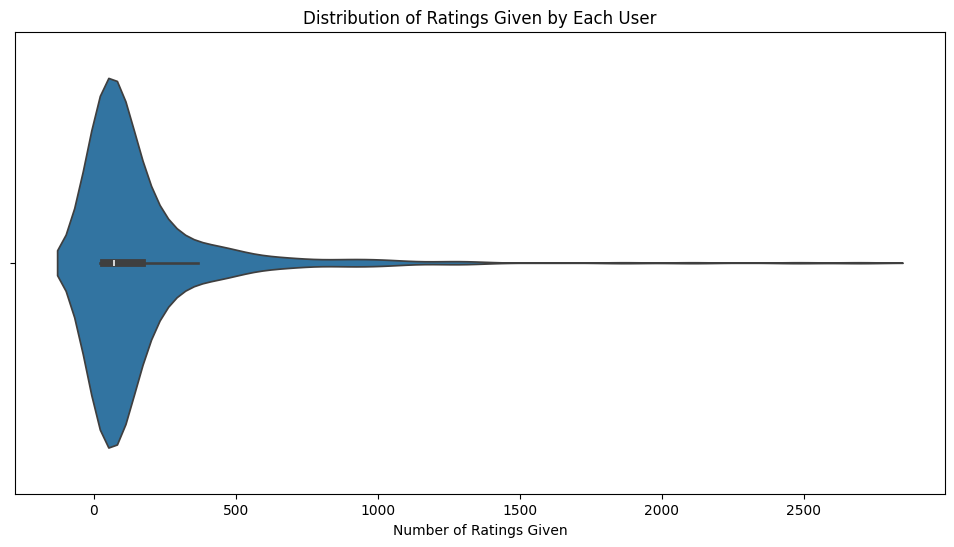

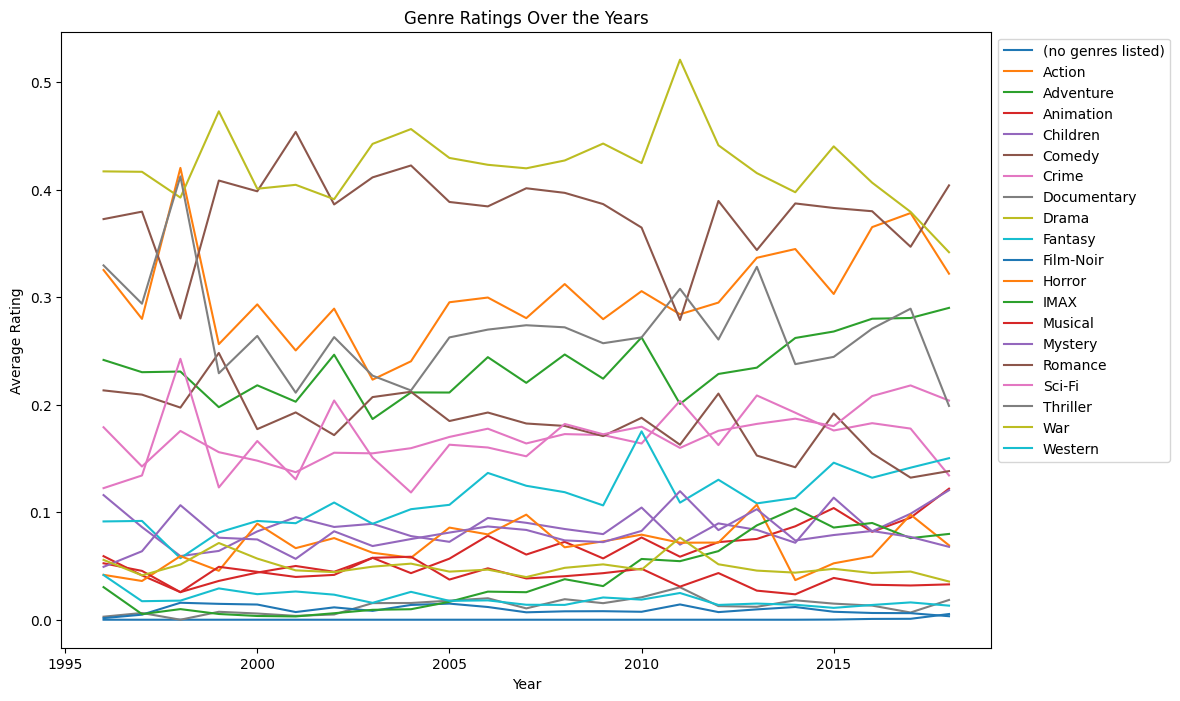


Movie Recommendations for User 1:
movieId
318     2.305419
589     1.460591
858     1.352217
4993    1.334975
150     1.269294
dtype: float64


In [ ]:

"""
Created on Sun Jan 21 19:41:03 2024

@author: nikhi
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

# Load data
movies = pd.read_csv('https://s3-us-west-2.amazonaws.com/recommender-tutorial/movies.csv')
ratings = pd.read_csv('https://s3-us-west-2.amazonaws.com/recommender-tutorial/ratings.csv')

# Display basic information about the movies dataframe
print("Movies DataFrame Info:")
print(movies.info())

# Display basic information about the ratings dataframe
print("\nRatings DataFrame Info:")
print(ratings.info())

# Display the first few rows of the movies dataframe
print("\nFirst few rows of Movies DataFrame:")
print(movies.head())

# Display the first few rows of the ratings dataframe
print("\nFirst few rows of Ratings DataFrame:")
print(ratings.head())

# Summary statistics for the ratings
print("\nSummary Statistics for Ratings:")
print(ratings.describe())

# Check for missing values in both dataframes
print("\nMissing Values in Movies DataFrame:")
print(movies.isnull().sum())

print("\nMissing Values in Ratings DataFrame:")
print(ratings.isnull().sum())

# Visualize the distribution of ratings using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], bins=5, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Countplot for ratings
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=ratings)
plt.title('Count of Each Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Correlation matrix to explore relationships between numerical variables
correlation_matrix = ratings.corr()

# Heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Calculate the average rating for each movie
average_ratings = ratings.groupby('movieId')['rating'].mean()

# Merge with movies dataframe to get movie titles
top_rated_movies = pd.merge(movies, average_ratings, on='movieId')

# Display top-rated movies
top_rated_movies = top_rated_movies.sort_values(by='rating', ascending=False).head(10)
print("\nTop-Rated Movies:")
print(top_rated_movies[['title', 'rating']])

# Convert timestamp to datetime
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

# Extract year from timestamp
ratings['year'] = ratings['timestamp'].dt.year

# Line plot for the count of ratings over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='rating', data=ratings.groupby('year')['rating'].count().reset_index())
plt.title('Movie Ratings Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.show()

# Count the number of ratings given by each user
user_ratings_count = ratings.groupby('userId')['rating'].count()

# Scatter plot for user engagement
plt.figure(figsize=(10, 6))
sns.scatterplot(x=user_ratings_count.index, y=user_ratings_count.values, alpha=0.5)
plt.title('User Engagement: Number of Ratings Given by Each User')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings Given')
plt.show()

# Violin plot for the distribution of ratings given by each user
plt.figure(figsize=(12, 6))
sns.violinplot(x=user_ratings_count.values)
plt.title('Distribution of Ratings Given by Each User')
plt.xlabel('Number of Ratings Given')
plt.show()

# Extract individual genres and create binary columns for each
genres_split = movies['genres'].str.get_dummies('|')

# Concatenate the binary genre columns with the movies dataframe
movies_with_genres = pd.concat([movies, genres_split], axis=1)

# Merge with ratings dataframe to get ratings for each genre
merged_genre_ratings = pd.merge(ratings, movies_with_genres, on='movieId')

# Calculate the average rating for each genre over time
genre_ratings_over_time = merged_genre_ratings.groupby(['year'])[genres_split.columns].mean()

# Line plot for genre ratings over time
plt.figure(figsize=(12, 8))
for genre in genres_split.columns:
    sns.lineplot(x='year', y=genre, data=genre_ratings_over_time, label=genre)
plt.title('Genre Ratings Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Pivot ratings dataframe to create a user-item matrix
user_movie_matrix = ratings.pivot(index='userId', columns='movieId', values='rating').fillna(0)

# Calculate cosine similarity between users
user_similarity = cosine_similarity(user_movie_matrix)

# Example: Get movie recommendations for User 1
user_id = 1
user_ratings = user_movie_matrix.loc[user_id].values.reshape(1, -1)
similarities = cosine_similarity(user_ratings, user_movie_matrix.values)
similar_users = np.argsort(similarities[0])[::-1][1:]  # Exclude the user itself

# Get movies the user has not rated yet
unrated_movies = user_movie_matrix.loc[user_id][user_movie_matrix.loc[user_id] == 0].index

# Calculate predicted ratings for unrated movies
predicted_ratings = user_movie_matrix.iloc[similar_users][unrated_movies].mean(axis=0)

# Get top N movie recommendations
top_recommendations = predicted_ratings.sort_values(ascending=False).head(5)

# Display movie recommendations for User 1
print(f"\nMovie Recommendations for User {user_id}:")
print(top_recommendations)



